In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file

file_path = r"C:\Users\ankit\Downloads\churn_data.xlsx"

sheet_name = 'vw_churndata'

data = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')


In [11]:
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-del    male   35      no        delhi                    7   
1   58353-mah  female   45     yes  maharashtra                   14   
2   25063-wes    male   51      no  west bengal                    4   
3   59787-kar    male   79      no    karnataka                    3   
4   28544-tam  female   80      no   tamil nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           yes             no  ...   
1                13        NaN           yes            yes  ...   
2                35     deal 5           yes             no  ...   
3                21     deal 4           yes             no  ...   
4                 8        NaN           yes             no  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      credit card           65.6        593.30          0.00   
1      credit card          

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Customer_Status'] = le.fit_transform(data['Customer_Status'].astype(str).str.strip())


In [13]:
data['Customer_Status'] = (
    data['Customer_Status']
        .str.strip()
        .str.lower()
)


In [14]:
print(len(data))
print(data['Customer_Status'].value_counts())

12014
Customer_Status
stayed     8550
churned    3464
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Customer_Status'] = le.fit_transform(data['Customer_Status'])


In [17]:
from sklearn.preprocessing import LabelEncoder

# ----- clean target -----
data['Customer_Status'] = (
    data['Customer_Status']
        .astype(str)
        .str.strip()
        .str.lower()
)

target_encoder = LabelEncoder()
data['Customer_Status'] = target_encoder.fit_transform(data['Customer_Status'])

# ----- drop unused -----
data = data.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], errors='ignore')

# ----- encode features -----
X = pd.get_dummies(data.drop('Customer_Status', axis=1), drop_first=True)
y = data['Customer_Status']

# ----- split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Confusion Matrix:
[[ 421  259]
 [ 105 1618]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       680
           1       0.86      0.94      0.90      1723

    accuracy                           0.85      2403
   macro avg       0.83      0.78      0.80      2403
weighted avg       0.84      0.85      0.84      2403



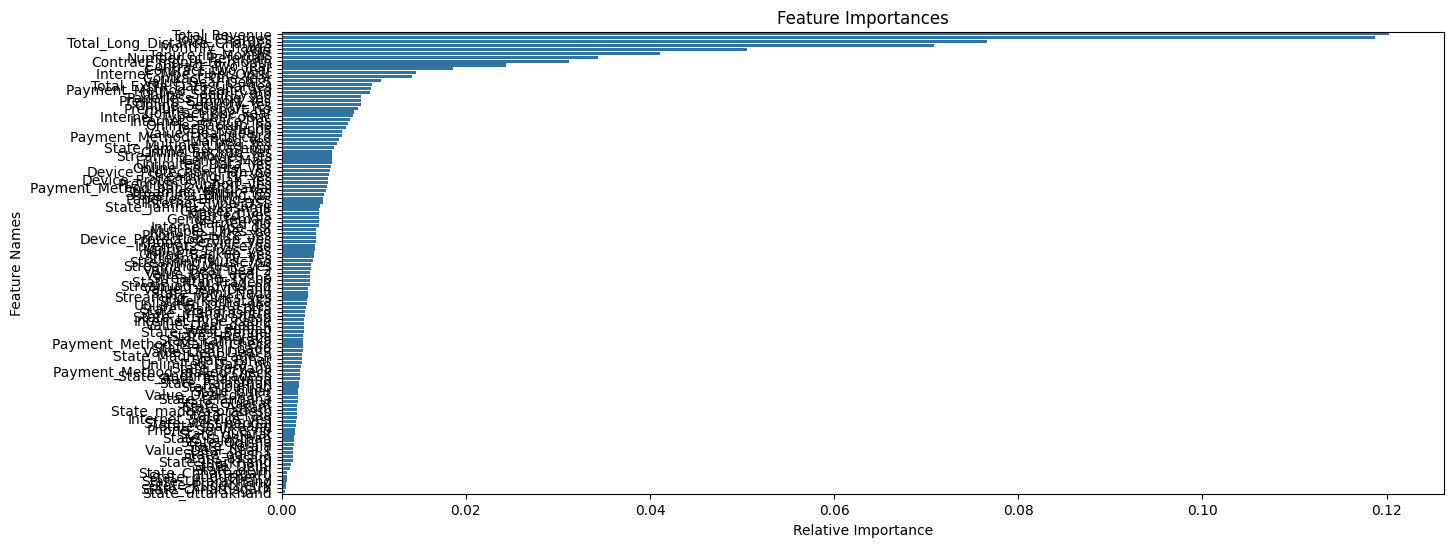

In [23]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [39]:
import pandas as pd

# ======================
# LOAD NEW DATA
# ======================
file_path = r"C:\Users\ankit\Downloads\churn_data.xlsx"
sheet_name = "vw_joindata"

new_data = pd.read_excel(file_path, sheet_name=sheet_name, engine="openpyxl")

print(new_data.head())

# keep original
original_data = new_data.copy()

# ======================
# DROP UNUSED COLUMNS
# ======================
new_data = new_data.drop(
    columns=['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
    errors='ignore'
)

# ======================
# SAME ENCODING AS TRAINING
# ======================
new_data = pd.get_dummies(new_data)

# IMPORTANT: match EXACT training columns
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# ======================
# PREDICT
# ======================
new_predictions = rf_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

# only churn customers
churn_customers = original_data[
    original_data['Customer_Status_Predicted'] == 1
]

# ======================
# SAVE
# ======================
churn_customers.to_csv(
    r"C:\Users\ankit\Downloads\churn_data.csv",
    index=False
)

print("Predictions saved successfully!")


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-guj  female   67      no         gujarat                   13   
1   57256-bih  female   18      no           bihar                    9   
2   72357-mad  female   53      no  madhya pradesh                   14   
3   66612-kar  female   58     yes       karnataka                   11   
4   22119-wes    male   31     yes     west bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     deal 5           yes            yes  ...   
1                 7        NaN           yes             no  ...   
2                12     deal 5           yes             no  ...   
3                18        NaN           yes             no  ...   
4                 5        NaN           yes             no  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  bank withdrawal          72.10          72.1           0.0   
1      cre